### **************************************************Logistic Regression*************************************************

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df=pd.read_csv('../DATA/hearing_test.csv')
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

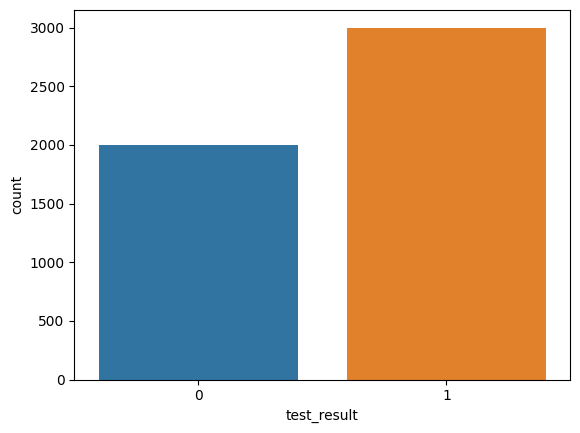

In [5]:
# plt.bar(df['test_result'],height=2)
sns.countplot(data=df,x='test_result')

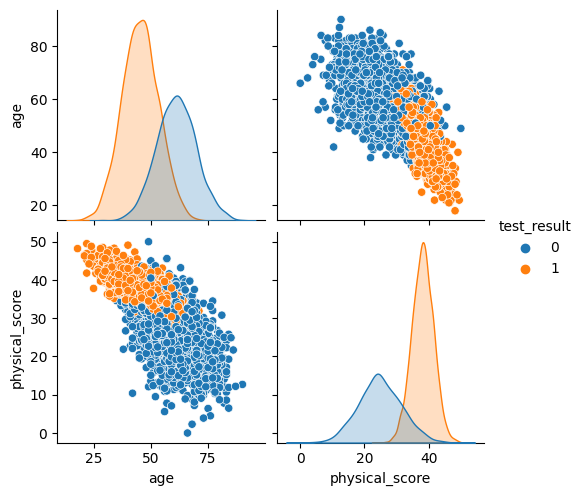

In [6]:
sns.pairplot(df,hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

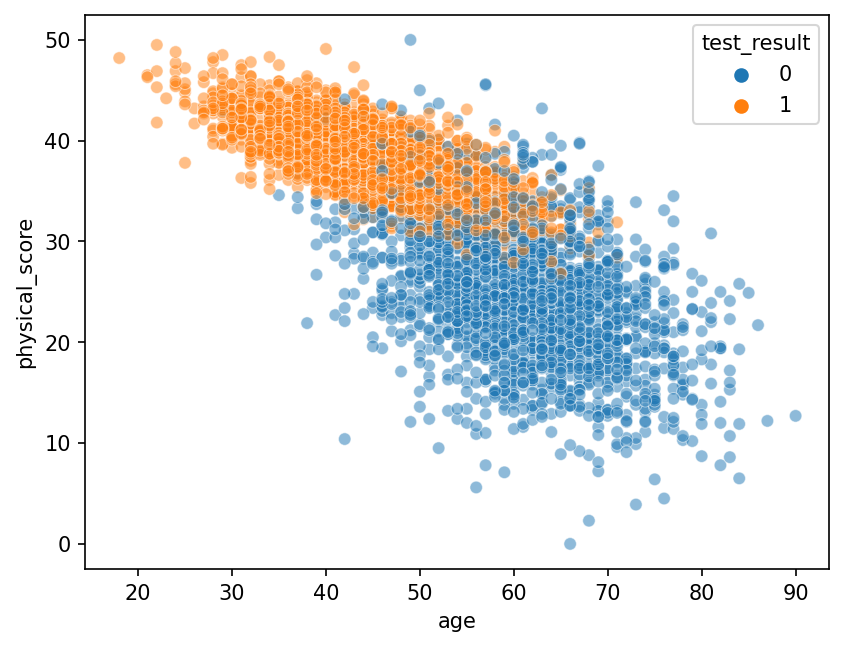

In [7]:
plt.figure(dpi=150)
sns.scatterplot(data=df,x='age',y='physical_score',hue='test_result',alpha=0.5)

<Axes: xlabel='test_result', ylabel='physical_score'>

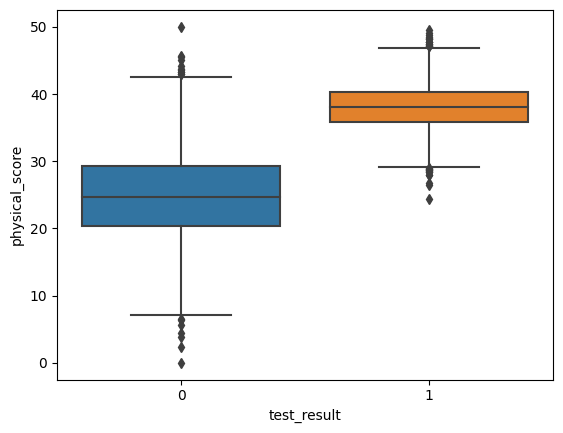

In [8]:
sns.boxplot(data=df,x='test_result',y='physical_score')

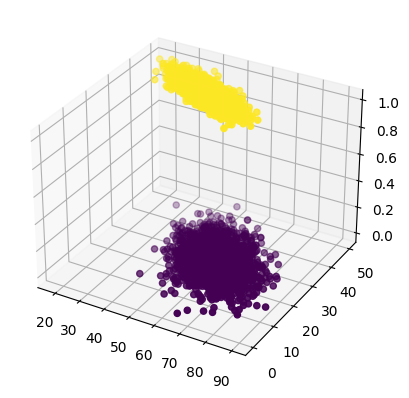

In [9]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

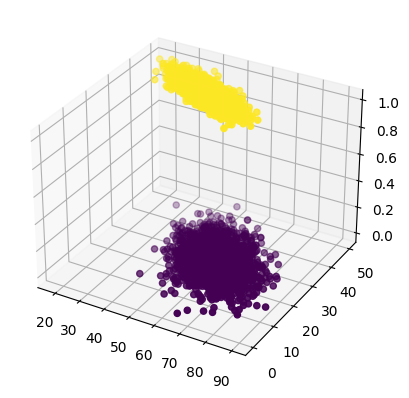

In [10]:
from mpl_toolkits.mplot3d import axes3d
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split

In [12]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import  LogisticRegression

In [17]:
model=LogisticRegression()

In [18]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [24]:
y_pred=model.predict(scaled_X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.93

In [33]:
cm=confusion_matrix(y_pred,y_test
                 
                 
                 )

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

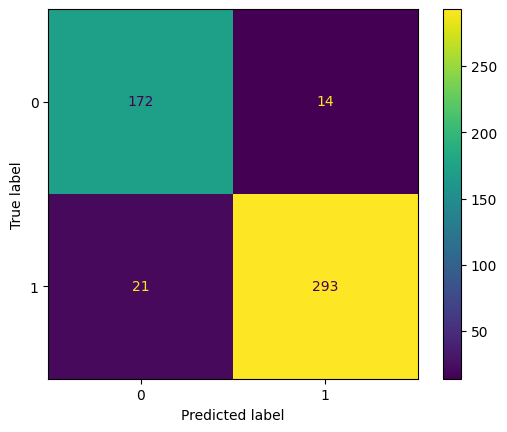

In [36]:
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import precision_score

In [40]:
precision_score(y_test,y_pred)

0.9331210191082803

In [54]:
model.coef_

array([[-0.94953524,  3.45991194]])

### Logistic regression with multi class classification

In [43]:
df=pd.read_csv('../DATA/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
some=df['species'].value_counts()

<Axes: xlabel='species', ylabel='count'>

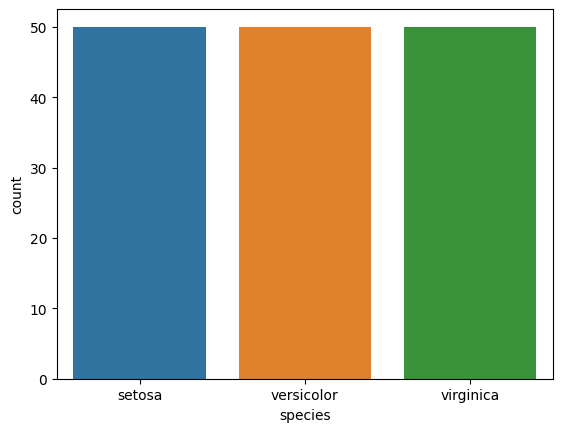

In [55]:
sns.countplot(x='species'
        ,data=df        )

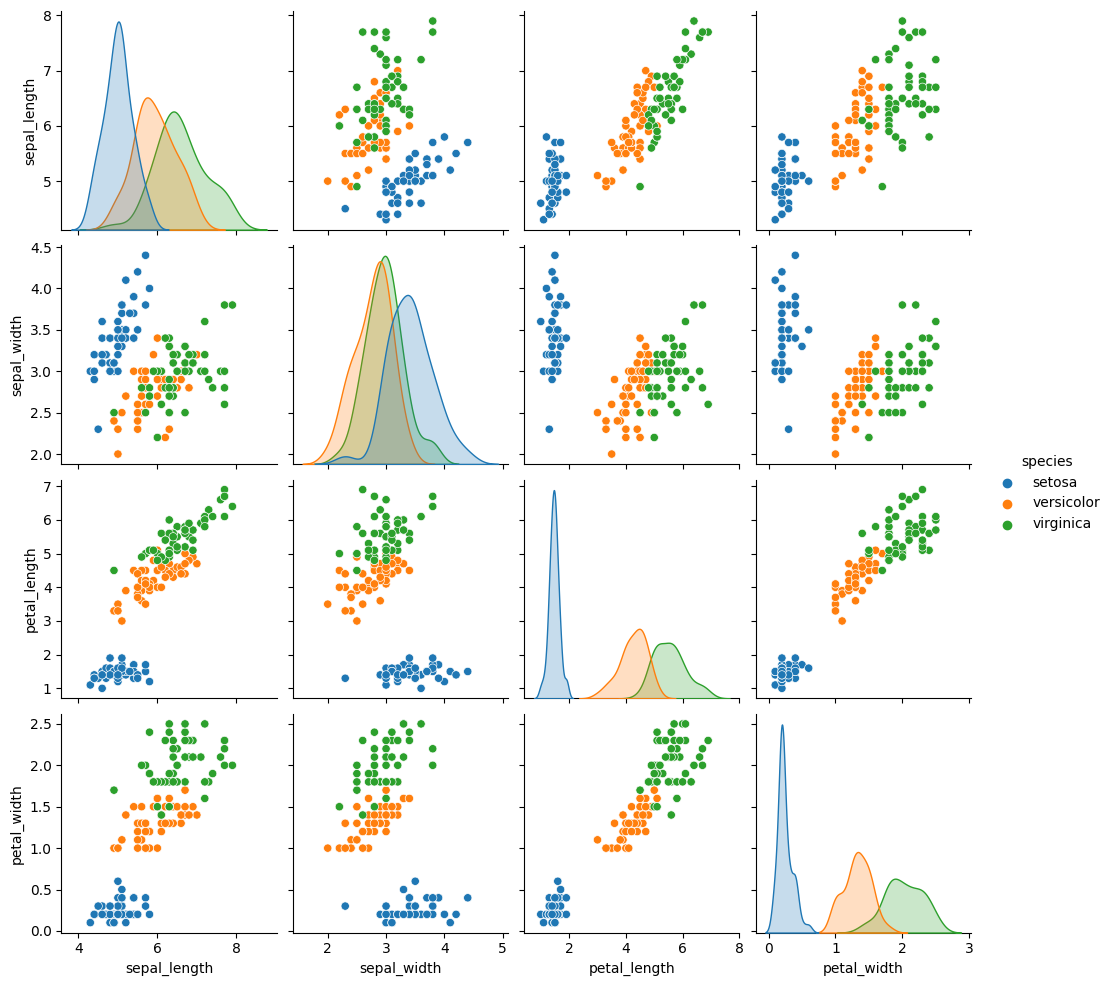

In [53]:
sns.pairplot(df,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

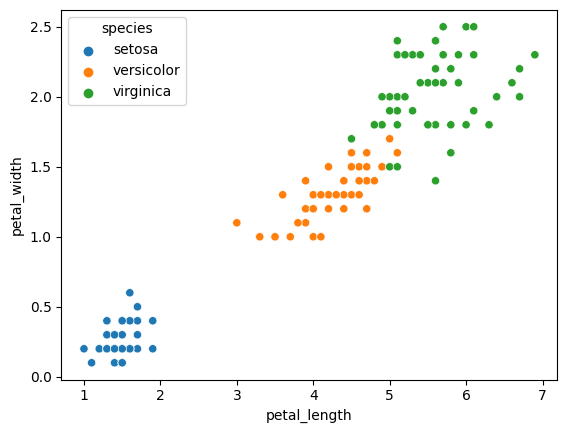

In [56]:
sns.scatterplot(data=df,x='petal_length',y='petal_width',hue='species')

In [70]:
X=df.drop('species',axis=1)
y=df['species']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [83]:
scaler = StandardScaler()

In [84]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [87]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [88]:
log_model=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000)

In [93]:
penalty=['l1','l2','elasticnet']
l1_ratio=np.linspace(0,1,10)
C=np.logspace(0,10,20)
param_grid={
    'penalty':penalty,
    'l1_ratio':l1_ratio,
    'C':C
}


In [94]:
grid_model=GridSearchCV(log_model,param_grid)

In [96]:
grid_model.fit(scaled_X_train,y_train)

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\adeeb\OneDrive\Desktop\python\machine learning cour

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [97]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [99]:
y_pred=grid_model.predict(X_test)
y_pred

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array(['setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica'], dtype=object)

In [100]:
accuracy_score(y_test,y_pred)

0.3684210526315789

In [101]:
confusion_matrix(y_test,y_pred
                 )

array([[ 3,  7,  0],
       [ 0,  0, 17],
       [ 0,  0, 11]], dtype=int64)

In [102]:
from sklearn.metrics import roc_curve, auc

In [121]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    # plt.show()

In [119]:
# def plot_multiclass_roc(clf,X_test,y_test,n_classes,figsize):
#     y_score = clf.predict_proba(X_test)
#     fpr=dict()
#     tpr=dict()
#     roc_auc=dict()
#     y_test_dummies=pd.get_dummies(y_test,drop_first=False)
#     for Class in range(n_classes):
#         fpr[Class],tpr[Class],_=roc_curve(y_test_dummies[:,Class],y_score[:,Class])
#         roc_auc[Class]=auc(fpr[Class],tpr[Class])
#     fig,ax=plt.subplots(figsize=figsize)
#     ax.plot([0,1],[0,1],"k--")
#     ax.set_xlim([0.0,1.0])
#     ax.set_ylim([0.0,1.05])
#     ax.set_xlabel('false_positive_rate')
#     ax.set_ylabel('true positive rate')
#     ax.set_title('receiver operatin charesteristic')


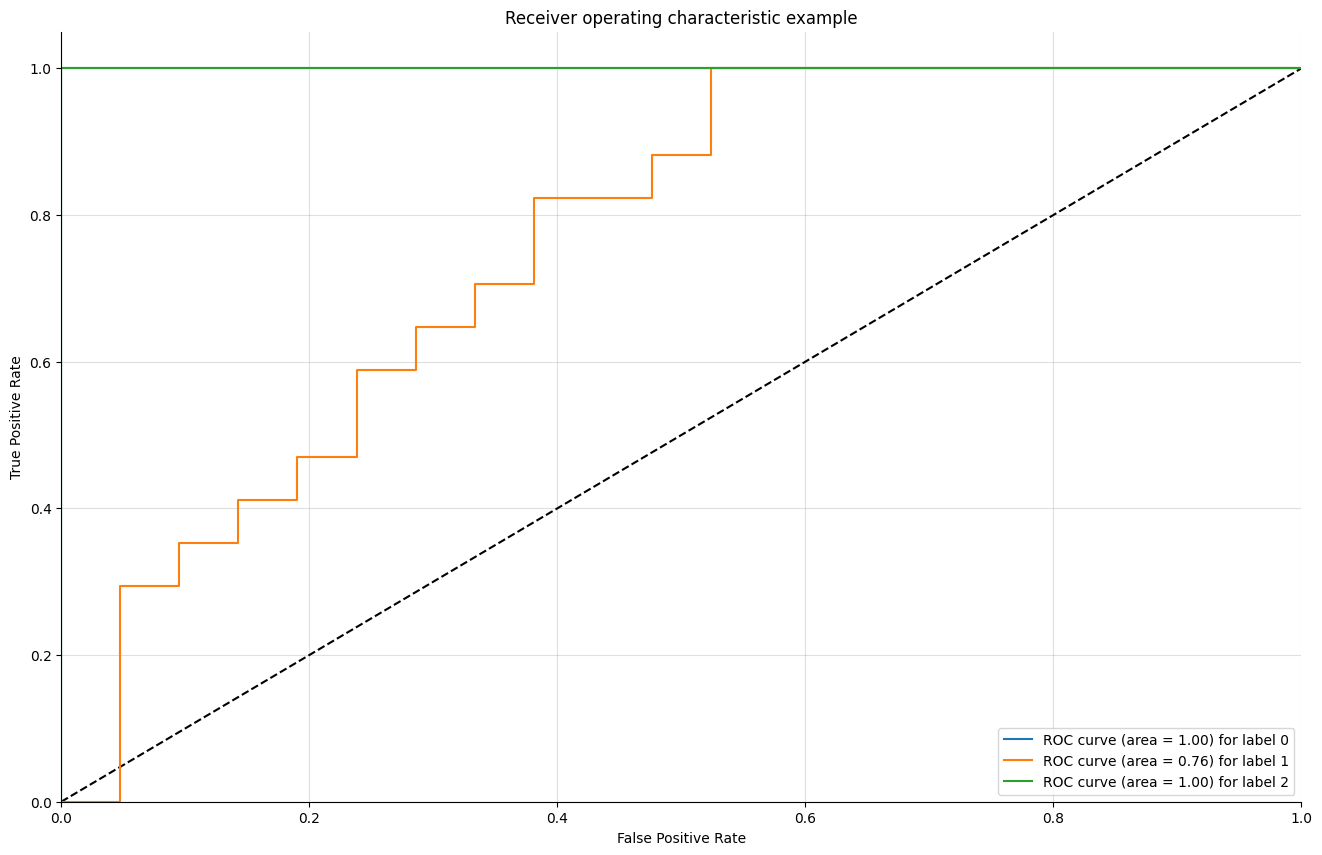

In [122]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))